In [ ]:
from sklearn import svm
import numpy as np

# Sample dataset without the Soil Type attribute and with N, P, and K attributes
data = np.array([
    # Soil pH, Nutrient Content (N), Nutrient Content (P), Nutrient Content (K)
    [6.5, 25, 15, 10],   # Tomato
    [6.0, 28, 12, 8],
    [6.3, 23, 14, 9],
    [5.5, 15, 11, 6],   # Carrot
    [5.7, 16, 12, 6],
    [5.3, 14, 10, 5],
    [7.0, 20, 16, 12],  # Lettuce
    [6.8, 21, 15, 11],
    [7.2, 19, 17, 13],
    [6.2, 18, 13, 10],  # Cucumber
    [6.5, 17, 14, 10],
    [6.1, 16, 12, 8],
    [5.8, 22, 10, 6],   # Pepper
    [5.9, 23, 11, 7],
    [6.0, 20, 13, 9],
])

# Corresponding plant names
plant_names = ["Tomato", "Tomato", "Tomato", "Carrot", "Carrot", "Carrot", "Lettuce", "Lettuce", "Lettuce", "Cucumber", "Cucumber", "Cucumber", "Pepper", "Pepper", "Pepper"]

# Target labels (the plant index)
target = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

# Create an SVM model
model = svm.SVC(kernel='linear')
model.fit(data, target)

# New data for plant suggestion
new_data = np.array([
    [6.4, 24, 13, 9]  # Example soil attributes for suggestion
])

# Predict the suggested plant
predicted_plant_index = model.predict(new_data)[0]
suggested_plant = plant_names[predicted_plant_index]
print("==============================")
print("Suggested Plant:", suggested_plant)
print("==============================")

Suggested Plant: Tomato


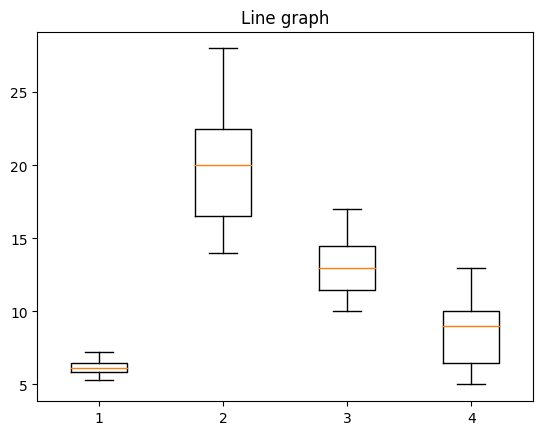

In [ ]:
plt.title("Line graph")
plt.boxplot(data)

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import numpy as np


X = np.array([
    # Sample dataset with features (month, year, and plant name) and food prices
    # Month and year are represented numerically (e.g., January 2023 as 202301)
    [202301, "Tomato"],
    [202302, "Tomato"],
    [202303, "Tomato"],
    [202304, "Tomato"],
    [202305, "Tomato"],
    [202301, "Carrot"],
    [202302, "Carrot"],
    [202303, "Carrot"],
    [202304, "Carrot"],
    [202305, "Carrot"],
    [202301, "Radish"],
    [202302, "Radish"],
    [202303, "Radish"],
    [202304, "Radish"],
    [202305, "Radish"],
])
y = np.array([120,112,130,100,125,80,87,83,92,89,49,52,50,55,47])  # Food prices in INR

# Use one-hot encoding for plant names
encoder = OneHotEncoder()
plant_names_encoded = encoder.fit_transform(X[:, 1].reshape(-1, 1)).toarray()

# Combine encoded plant names with other features
X_encoded = np.column_stack((X[:, 0].astype(float), plant_names_encoded))

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_encoded, y)

# New data for price prediction (month, year, and plant name)
new_data = np.array([[202306, suggested_plant]])

# Encode the plant name in the new data
new_data_encoded = np.column_stack((new_data[:, 0].astype(float), encoder.transform(new_data[:, 1].reshape(-1, 1)).toarray()))

# Predict the food price
predicted_price = dt_model.predict(new_data_encoded)
print("========================================")
print("Suggested Plant:", suggested_plant)
print("========================================")
print("Predicted Food Price:", predicted_price[0], "INR PER KG")
print("========================================")


Suggested Plant: Tomato
Predicted Food Price: 125.0 INR PER KG


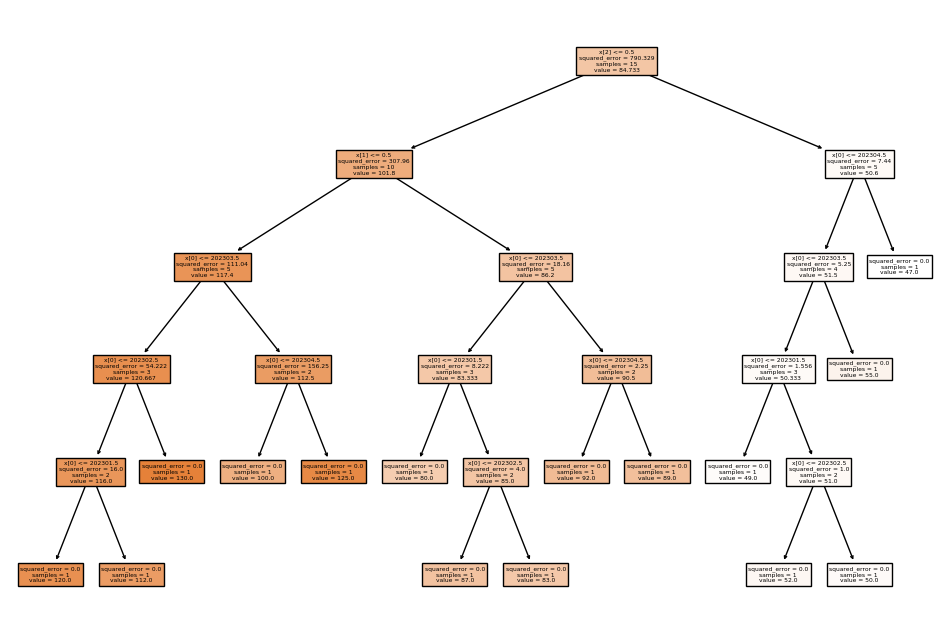

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True)
plt.show()